# Rivan Abdillah (2009106025)
## POSTTEST 5 KB


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

### Membaca Dataset

In [19]:
ds = pd.read_csv("Cleaned_Laptop_data.csv")
ds.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


### Data Split Test dan Train

In [17]:
X = ds.drop(['msoffice', 'brand', 'model', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',  'weight', 'display_size', 'Touchscreen'], axis=1)
Y = ds[['msoffice']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
X.head()

,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
0,0,0,24990,32790,23,3.7,63,12
1,0,0,19590,21325,8,3.6,1894,256
2,0,0,19990,27990,28,3.7,1153,159
3,0,0,21490,27990,23,3.7,1153,159
4,0,0,24990,33490,25,3.7,1657,234


## Algoritma Decision Tree

In [18]:
dTree = DecisionTreeClassifier()
dTree.fit(X_train, Y_train)

DecisionTreeClassifier()

### Report Classification

In [20]:
dTree_pred = dTree.predict(X_test)
print(classification_report(Y_test, dTree_pred))

              precision    recall  f1-score   support

          No       0.78      0.81      0.79       176
         Yes       0.60      0.56      0.58        93

    accuracy                           0.72       269
   macro avg       0.69      0.68      0.69       269
weighted avg       0.72      0.72      0.72       269



### Akurasi Decision Tree

In [21]:
acc_dTree = accuracy_score(Y_test, dTree_pred)
print("Akurasi Decision Tree: ", round(acc_dTree,3))

Akurasi Decision Tree:  0.721


### Plotting Confusion Matrix dari Decision Tree

C:\Users\Acer Gk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


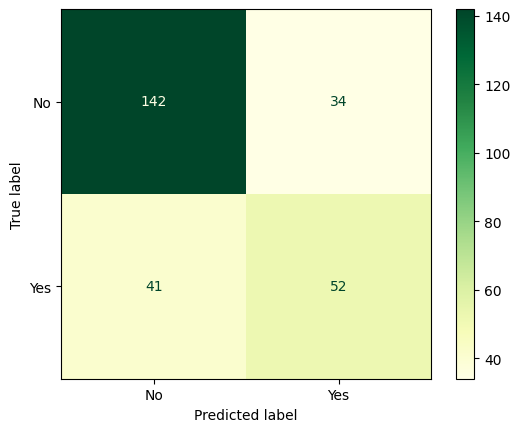

In [25]:
plot_confusion_matrix(dTree, X_test, Y_test, cmap="YlGn")

## Algoritma K-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier()
Knn.fit(X_train, Y_train)

C:\Users\Acer Gk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

### Akurasi K-Nearest Neighbors

In [30]:
acc_Knn = Knn.score(X_test, Y_test)
print("Akurasi Algoritma KNN : ", round(acc_Knn,2))

Akurasi Algoritma KNN :  0.63


### Report Classification

In [31]:
Y_pred = Knn.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

          No       0.68      0.84      0.75       176
         Yes       0.44      0.24      0.31        93

    accuracy                           0.63       269
   macro avg       0.56      0.54      0.53       269
weighted avg       0.59      0.63      0.60       269



### Plotting Confussion Matrix KNN

C:\Users\Acer Gk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


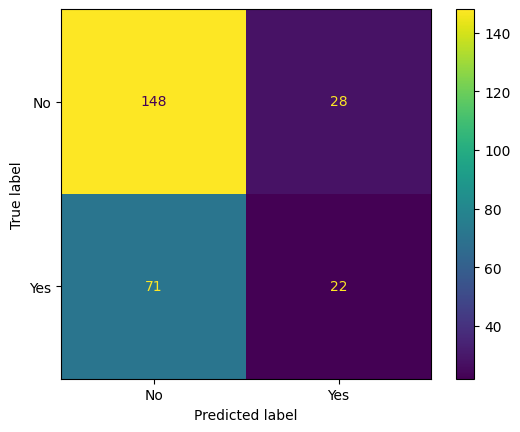

In [37]:
confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(Knn, X_test, Y_test)

## Perbandingan Akurasi Algoritma

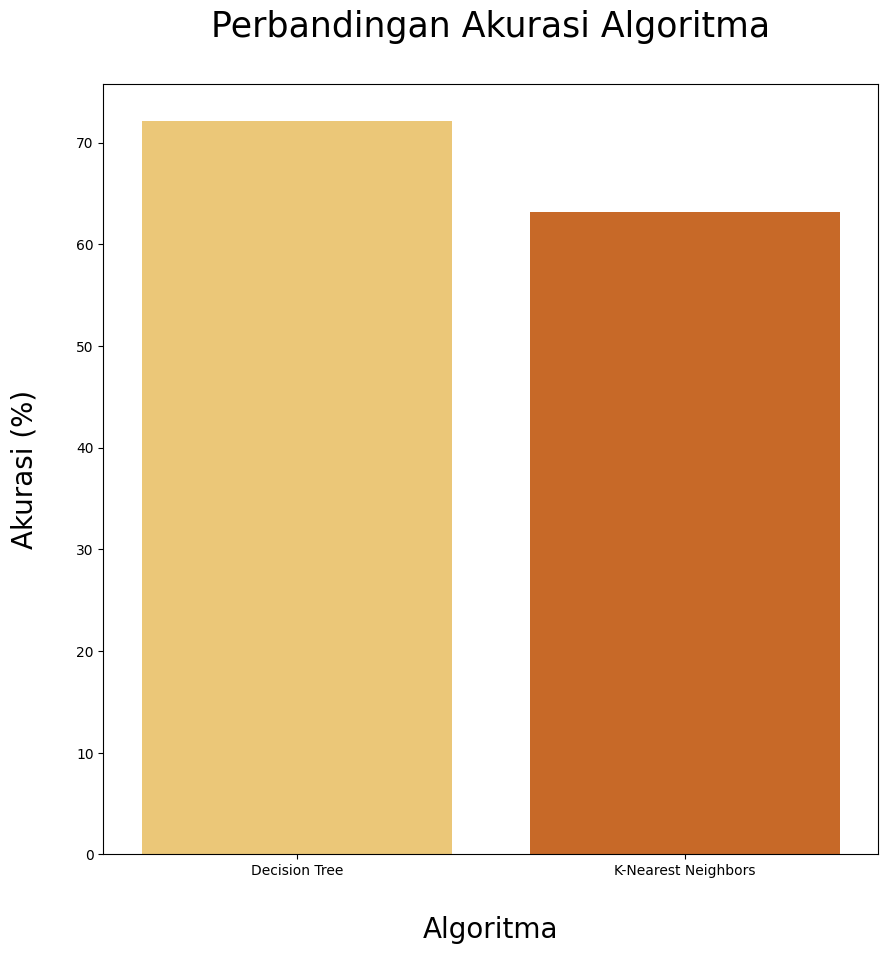

In [43]:
algorithm = ["Decision Tree", "K-Nearest Neighbors"]
nilaiPredict = [acc_dTree*100,acc_Knn*100]

plt.figure(figsize=(10,10))
color = ['red', 'green']
sns.barplot(x= algorithm, y= nilaiPredict, palette='YlOrBr')
plt.title("Perbandingan Akurasi Algoritma\n", fontsize=25)
plt.ylabel("Akurasi (%)\n", fontsize =20)
plt.xlabel("\nAlgoritma", fontsize=20)
plt.show()

### Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

Confusion Matrix 

 [[141  35]
 [ 38  55]]


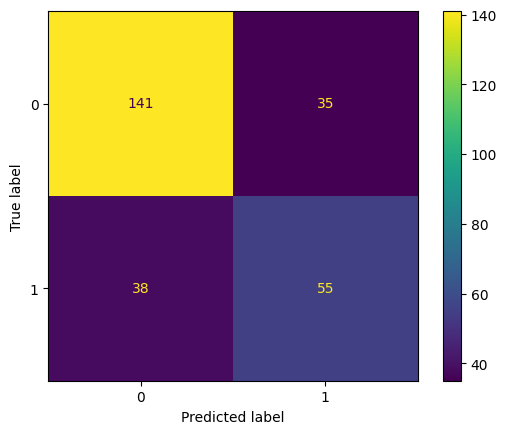

In [46]:
clf = DecisionTreeClassifier()
dTree = clf.fit(X_train, Y_train)

dTree_pred = dTree.predict(X_test)

dTree_cm = confusion_matrix(Y_test, dTree_pred)
print('Confusion Matrix \n\n', dTree_cm)

show = ConfusionMatrixDisplay(confusion_matrix=dTree_cm)
show.plot()
plt.grid(False)
plt.show()

### Report Classification

In [47]:
print(classification_report(Y_test, dTree_pred))

              precision    recall  f1-score   support

          No       0.79      0.80      0.79       176
         Yes       0.61      0.59      0.60        93

    accuracy                           0.73       269
   macro avg       0.70      0.70      0.70       269
weighted avg       0.73      0.73      0.73       269

